In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/kaggle/input/monthly-sales-of-french-champagne/monthly_champagne_sales.csv"
df=pd.read_csv(path)

In [3]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [5]:
df

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [6]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

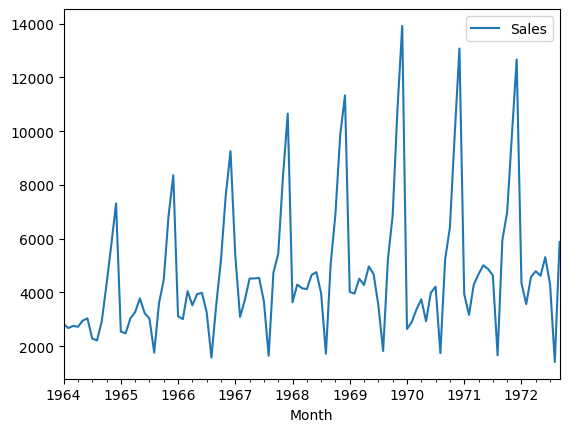

In [9]:
df.plot()

In [10]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(df['Sales'])

In [12]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276224
p-value : 0.36391577166024536
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [15]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [16]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [17]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [18]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

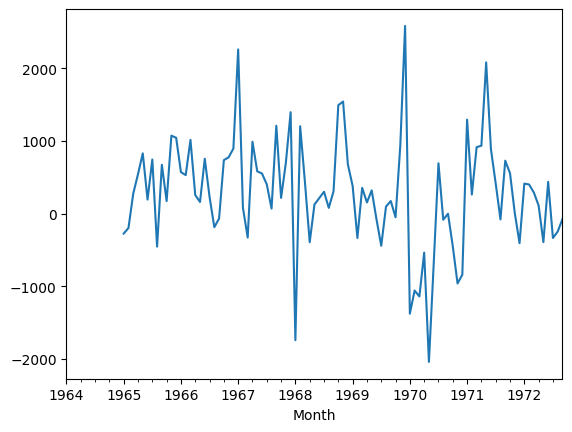

In [19]:
df['Seasonal First Difference'].plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

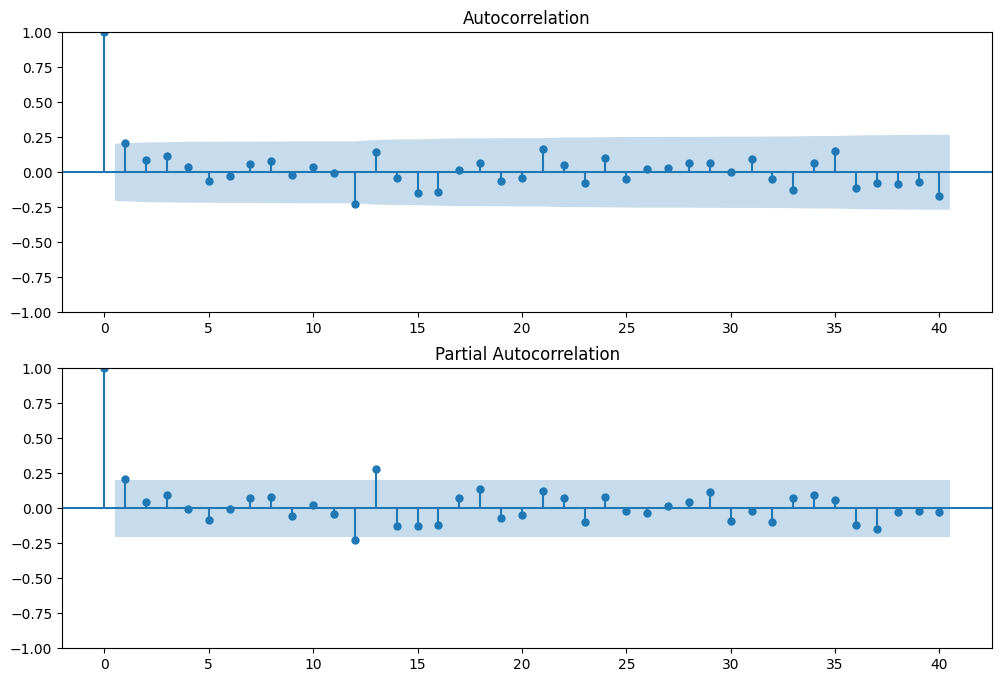

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 19 Mar 2024   AIC                           1911.627
Time:                        13:55:21   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
df

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
...,...,...,...
1972-05-01,4618,-170.0,-392.0
1972-06-01,5312,694.0,438.0
1972-07-01,4298,-1014.0,-335.0


In [26]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1967,12,1)
test_dataset_end=datetime(1972,12,1)

In [27]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [28]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
test_data

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1968-01-01,3633,-7018.0,-1742.0
1968-02-01,4292,659.0,1204.0
1968-03-01,4154,-138.0,436.0
1968-04-01,4121,-33.0,-393.0
1968-05-01,4647,526.0,127.0
1968-06-01,4753,106.0,214.0
1968-07-01,3965,-788.0,302.0
1968-08-01,1723,-2242.0,80.0
1968-09-01,5048,3325.0,309.0


In [30]:
train_data

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [31]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
test_data

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1968-01-01,3633,-7018.0,-1742.0
1968-02-01,4292,659.0,1204.0
1968-03-01,4154,-138.0,436.0
1968-04-01,4121,-33.0,-393.0
1968-05-01,4647,526.0,127.0
1968-06-01,4753,106.0,214.0
1968-07-01,3965,-788.0,302.0
1968-08-01,1723,-2242.0,80.0
1968-09-01,5048,3325.0,309.0


In [33]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1968-01-01 00:00:00
1972-09-01 00:00:00


In [34]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Sales']-pred

In [35]:
pred

1968-01-01    7332.119633
1968-02-01    4011.111321
1968-03-01    4320.561393
1968-04-01    4251.977129
1968-05-01    4232.385934
1968-06-01    4485.952373
1968-07-01    4543.434406
1968-08-01    4165.179492
1968-09-01    3061.542027
1968-10-01    4641.466144
1968-11-01    5571.855097
1968-12-01    7053.758768
1969-01-01    7870.088221
1969-02-01    4413.222869
1969-03-01    4370.804163
1969-04-01    4626.906854
1969-05-01    4508.587429
1969-06-01    4838.753423
1969-07-01    4700.989575
1969-08-01    4136.482642
1969-09-01    3284.377714
1969-10-01    4895.829603
1969-11-01    5712.649701
1969-12-01    7671.426856
1970-01-01    9297.225078
1970-02-01    3946.935510
1970-03-01    4029.781881
1970-04-01    4221.634787
1970-05-01    4373.593736
1970-06-01    3955.400300
1970-07-01    4437.767538
1970-08-01    4535.343546
1970-09-01    3314.634722
1970-10-01    4961.727703
1970-11-01    5557.581001
1970-12-01    7254.829218
1971-01-01    8919.906878
1971-02-01    4597.580870
1971-03-01  

In [36]:
residuals

Month
1968-01-01   -3699.119633
1968-02-01     280.888679
1968-03-01    -166.561393
1968-04-01    -130.977129
1968-05-01     414.614066
1968-06-01     267.047627
1968-07-01    -578.434406
1968-08-01   -2442.179492
1968-09-01    1986.457973
1968-10-01    2280.533856
1968-11-01    4286.144903
1968-12-01    4277.241232
1969-01-01   -3854.088221
1969-02-01    -456.222869
1969-03-01     139.195837
1969-04-01    -350.906854
1969-05-01     459.412571
1969-06-01    -161.753423
1969-07-01   -1177.989575
1969-08-01   -2315.482642
1969-09-01    1937.622286
1969-10-01    1976.170397
1969-11-01    5090.350299
1969-12-01    6244.573144
1970-01-01   -6658.225078
1970-02-01   -1047.935510
1970-03-01    -659.781881
1970-04-01    -481.634787
1970-05-01   -1446.593736
1970-06-01      30.599700
1970-07-01    -220.767538
1970-08-01   -2797.343546
1970-09-01    1906.365278
1970-10-01    1462.272297
1970-11-01    4284.418999
1970-12-01    5821.170782
1971-01-01   -4985.906878
1971-02-01   -1435.580870
1971-0

<Axes: ylabel='Density'>

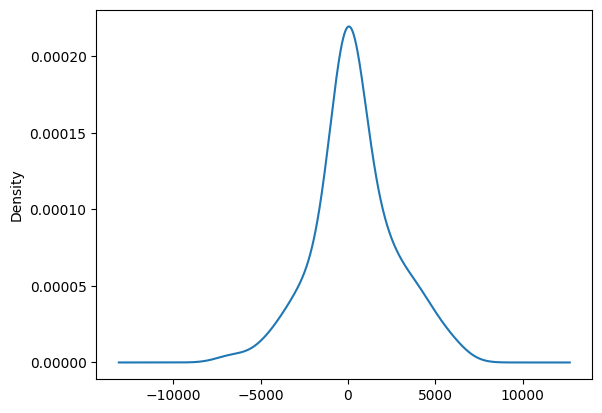

In [37]:
model_fit.resid.plot(kind='kde')

In [38]:
test_data['Predicted_ARIMA']=pred

<Axes: xlabel='Month'>

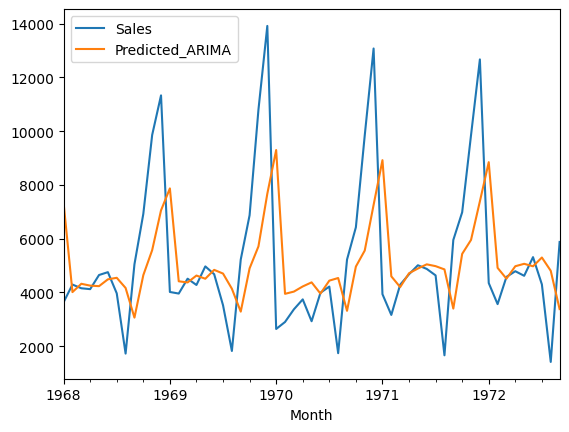

In [39]:
test_data[['Sales','Predicted_ARIMA']].plot()

<Axes: xlabel='Month'>

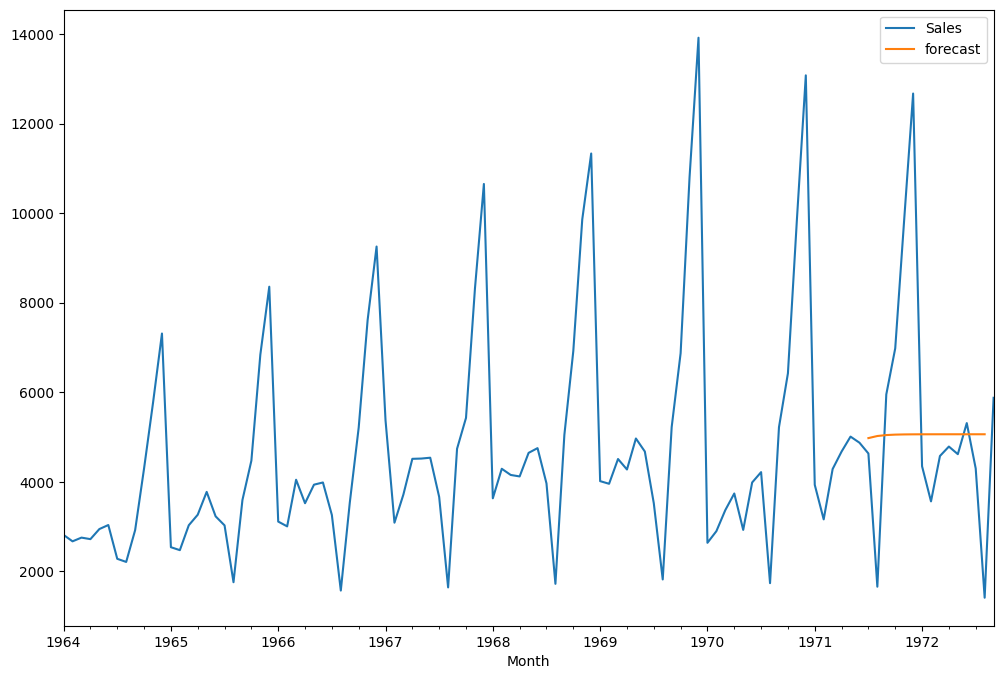

In [40]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [41]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99455D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05918D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18424D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06168D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.73652D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<Axes: xlabel='Month'>

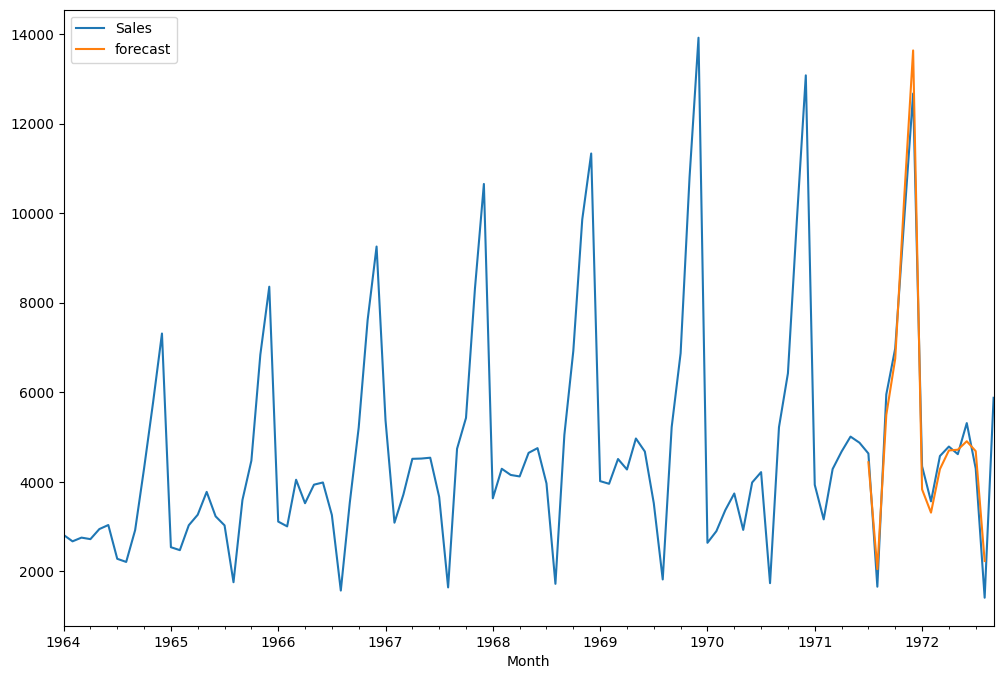

In [42]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))